# **Business Analytics (MGT3614)**

---



 By -
  Rahul Yadav (20BCD7127)

Add Dataset from 
https://www.kaggle.com/datasets/thedevastator/global-video-game-sales-ratings?select=Tagged-Data-Final.csv

Descriptive Analysis

What is the purpose of this game sales analysis?


The purpose of this game sales analysis is to gain insights into the video game industry and understand the factors that influence the sales of video games. By analyzing the sales data and ratings of video games across different platforms, genres, and regions, this analysis can help game developers, publishers, and investors make informed decisions about game development, marketing, and distribution. Additionally, the analysis can also be useful for understanding consumer behavior and preferences in the video game market, which can inform future game development and marketing strategies.

In [1]:
import pandas as pd

# Load data
df = pd.read_csv("Tagged-Data-Final.csv")
print(df.describe())

       Year_of_Release     NA_Sales     EU_Sales     JP_Sales  Other_Sales  \
count      6894.000000  6894.000000  6894.000000  6894.000000   6894.00000   
mean       2007.482303     0.390920     0.234517     0.063867      0.08200   
std           4.236401     0.963231     0.684214     0.286461      0.26862   
min        1985.000000     0.000000     0.000000     0.000000      0.00000   
25%        2004.000000     0.060000     0.020000     0.000000      0.01000   
50%        2007.000000     0.150000     0.060000     0.000000      0.02000   
75%        2011.000000     0.390000     0.210000     0.010000      0.07000   
max        2016.000000    41.360000    28.960000     6.500000     10.57000   

       Global_Sales  Critic_Score  Critic_Count   User_Score    User_Count  
count   6894.000000   6894.000000   6894.000000  6894.000000   6894.000000  
mean       0.771487     70.258486     28.842472     7.184378    174.392370  
std        1.954780     13.861082     19.194572     1.439806    58

Problem Statement 1: Which video game genres are the most popular and profitable?

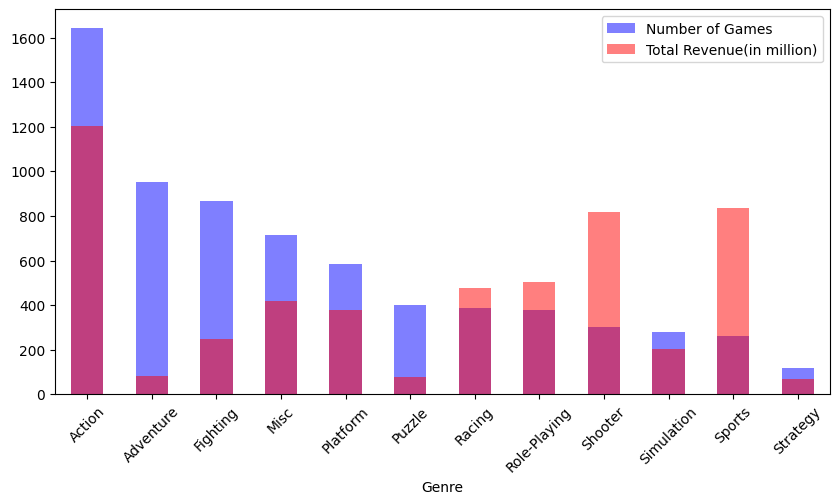

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Tagged-Data-Final.csv")

# Count the number of games in each genre
genre_count = df['Genre'].value_counts()

# Calculate the total revenue and average revenue per game for each genre
genre_revenue = df.groupby('Genre')['Global_Sales'].agg(['sum', 'mean'])

# Visualize the results in a bar chart
fig, ax = plt.subplots(figsize=(10, 5))
genre_count.plot(kind='bar', ax=ax, color='b', alpha=0.5, label='Number of Games')
genre_revenue['sum'].plot(kind='bar', ax=ax, color='r', alpha=0.5, label='Total Revenue(in million)')
plt.xticks(rotation=45)
plt.legend()
plt.show()



Problem Statement 2: How have video game sales changed over time?

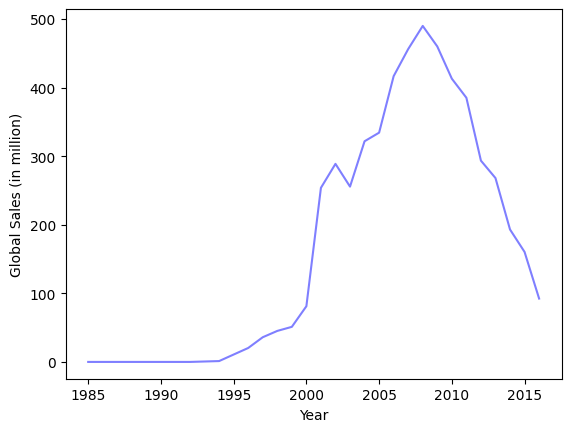

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Tagged-Data-Final.csv")

# Group the sales data by year
df['Year_of_Release'] = pd.to_datetime(df['Year_of_Release'], format='%Y')
yearly_sales = df.groupby(df['Year_of_Release'].dt.year)['Global_Sales'].sum()

# Visualize the results in a line chart
plt.plot(yearly_sales.index, yearly_sales.values, color='b', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Global Sales (in million)')
plt.show()


Problem Statement 3: Which video game genre have the most sales?

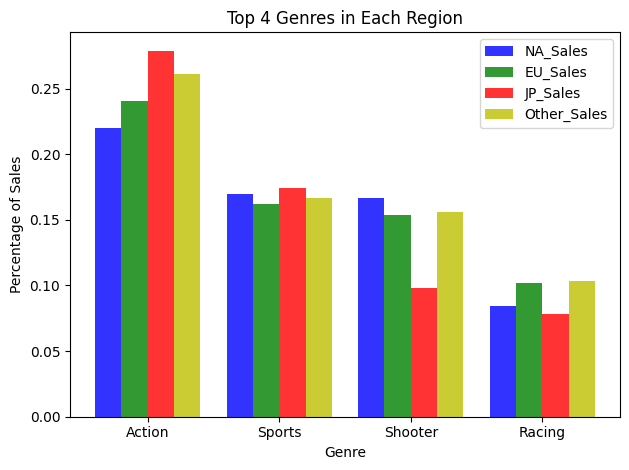

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Tagged-Data-Final.csv")

# Calculate the percentage of sales each genre contributes to the total sales in each region
region_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
genre_sales = df.groupby('Genre')[region_cols].sum()
genre_sales_pct = genre_sales.apply(lambda x: x / x.sum())

# Get the top 5 genres in each region
top_genres = {}
for region in region_cols:
    top_genres[region] = genre_sales_pct.sort_values(by=region, ascending=False).head(4).index.tolist()

# Visualize the top 4 genres in each region using a grouped bar chart
colors = ['b', 'g', 'r', 'y']
fig, ax = plt.subplots()
x_pos = list(range(len(top_genres)))
bar_width = 0.2

for i, region in enumerate(region_cols):
    ax.bar([x + i*bar_width for x in x_pos], genre_sales_pct.loc[top_genres[region], region], color=colors[i], width=bar_width, alpha=0.8, label=region)

plt.xticks([x + bar_width*1.5 for x in x_pos], top_genres[region_cols[0]])
plt.xlabel('Genre')
plt.ylabel('Percentage of Sales')
plt.title('Top 4 Genres in Each Region')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()




Problem Statement 4: Is there a correlation between video game critic scores and sales?

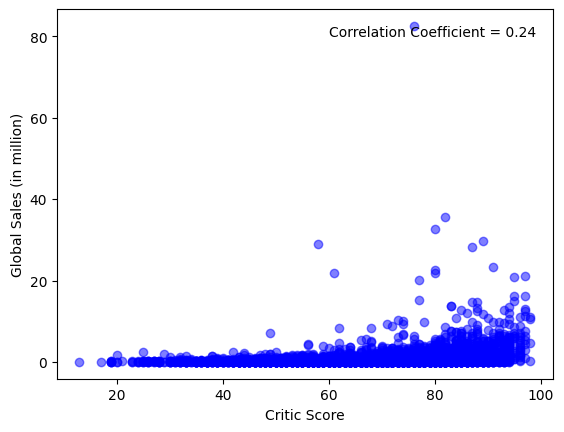

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Tagged-Data-Final.csv")

# Calculate the correlation coefficient between critic scores and global sales
corr = df[['Critic_Score', 'Global_Sales']].corr().iloc[0,1]

# Visualize the relationship between critic scores and global sales in a scatter plot
plt.scatter(df['Critic_Score'], df['Global_Sales'], color='b', alpha=0.5)
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (in million)')
plt.text(60, 80, f'Correlation Coefficient = {corr:.2f}')
plt.show()
